임의의 50개의 샘플 데이터를 사용한 경우

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [2]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y=y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8755555555555555

50개의 클러스터에 대한 대표 이미지(센트로이드와 가까운 샘플)를 사용한 경우

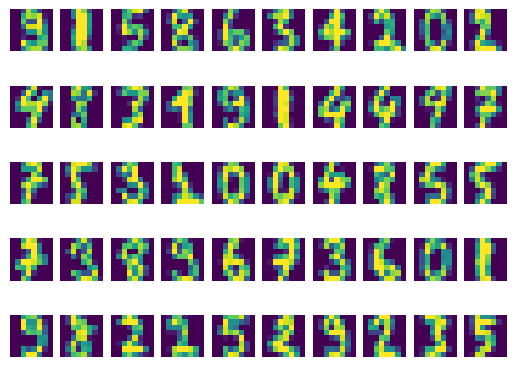

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

fig = plt.figure()
for i in range(5):
    for j in range(10):
        ax = fig.add_subplot(5, 10, i*10 + j +1)
        ax.imshow(X_representative_digits[i*10 + j].reshape(8,8))
        ax.set_axis_off()
plt.show()

위 코드가 실행될 때마다 아래 코드를 수동으로 바꾸어 주어야 잘 작동함.

In [ ]:
y_representative_digits = np.array([1,0,8,4,3,7,6,5,6,0,8,7,2,1,4,1,3,5,6,3,1,2,8,4,9,0,8,2,8,1,9,6,5,0,4,1,7,5,8,0,7,9,2,4,4,5,4,5,1,3])

In [5]:
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/deeplearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.12444444444444444

레이블을 전파한 경우

In [6]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [7]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/deeplearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.08888888888888889

센트로이드와 가까운 샘플의 20%에만 레이블을 전파한 경우

In [8]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] # 정수 배열 인덱스(생소)

In [9]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)                 # 군집별 샘플 대상
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)   # 군집별 센트로이드 근접도 상위 20% 경곗값
    above_cutoff = (X_cluster_dist > cutoff_distance)  # 군집별 센트로이드 근접도 상위 20% 이내 샘플 대상
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [10]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/deeplearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.12

In [12]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.08275862068965517